In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# --- 1. Configuration and Data Generation ---

# Set a seed for reproducibility
torch.manual_seed(42)

# True parameters for the synthetic data: y = W * x + b
TRUE_W = 3.0
TRUE_B = 2.0

# Generate 100 data points and add Gaussian noise
X = torch.linspace(0, 10, 100).view(-1, 1) # 100 x 1 tensor for input
# y = TRUE_W * X + TRUE_B + noise
y_true = TRUE_W * X + TRUE_B
y_noise = torch.randn_like(y_true) * 0.99 # Add a small amount of noise
y = y_true + y_noise

# View data as a Pandas df
pd.DataFrame({'X': X.flatten(),
              'y': y.flatten()}).head(3)

,X,y
0,0.00000,3.907646
1,0.10101,3.775442
2,0.20202,3.497771


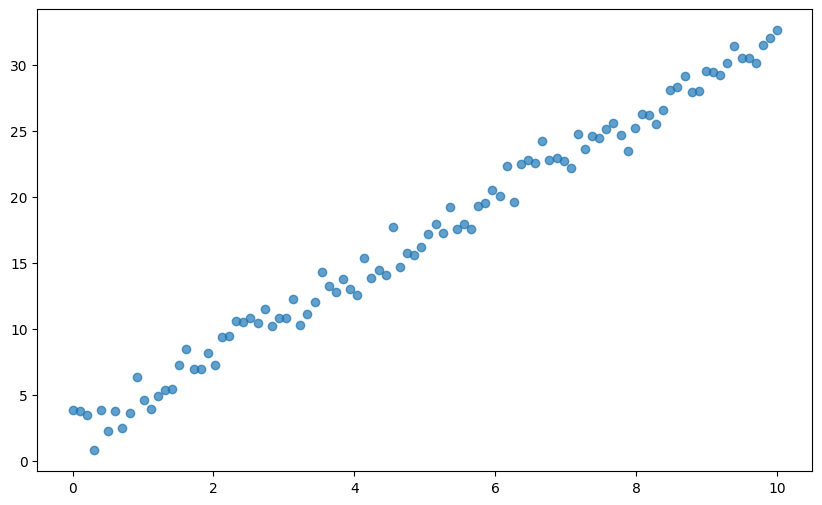

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, alpha=0.7);

In [33]:
# --- 2. Model Definition ---

class LinearRegression(nn.Module):
    """A simple linear regression model: y_hat = W * x + b"""
    def __init__(self, input_dim, output_dim):
        super().__init__()
        # nn.Linear automatically initializes W (weights) and b (bias)
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        """The forward pass computation"""
        return self.linear(x)

# Instantiate the model (1 input feature, 1 output)
model = LinearRegression(input_dim=1, output_dim=1)

In [36]:
# --- 3. Loss Function and Optimizer ---

# Mean Squared Error (MSE) is standard for regression
criterion = nn.MSELoss()

# Stochastic Gradient Descent (SGD) with a small learning rate (lr)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [38]:
# --- 4. Training Loop ---

NUM_EPOCHS = 500
loss_history = []

print(f"Initial W: {model.linear.weight.item():.4f}, Initial B: {model.linear.bias.item():.4f}")

for epoch in range(NUM_EPOCHS):
    # 1. Forward Pass: Compute prediction
    y_pred = model(X)

    # 2. Compute Loss
    loss = criterion(y_pred, y)
    loss_history.append(loss.item())

    # 3. Zero Gradients: Clear old gradients before the backward pass
    optimizer.zero_grad()

    # 4. Backward Pass: Compute gradient of the loss w.r.t W and b
    loss.backward()

    # 5. Update Parameters: Adjust W and b using the calculated gradients
    optimizer.step()

    # Print status every 50 epochs
    if (epoch + 1) % 50 == 0:
        current_w = model.linear.weight.item()
        current_b = model.linear.bias.item()
        print(f'Epoch {epoch+1:4d}/{NUM_EPOCHS} | Loss: {loss.item():.4f} | W: {current_w:.4f} | B: {current_b:.4f}')

Initial W: 2.9967, Initial B: 2.0712
Epoch   50/500 | Loss: 0.9438 | W: 2.9962 | B: 2.0750
Epoch  100/500 | Loss: 0.9438 | W: 2.9957 | B: 2.0779
Epoch  150/500 | Loss: 0.9438 | W: 2.9954 | B: 2.0802
Epoch  200/500 | Loss: 0.9438 | W: 2.9951 | B: 2.0820
Epoch  250/500 | Loss: 0.9437 | W: 2.9949 | B: 2.0834
Epoch  300/500 | Loss: 0.9437 | W: 2.9947 | B: 2.0845
Epoch  350/500 | Loss: 0.9437 | W: 2.9946 | B: 2.0853
Epoch  400/500 | Loss: 0.9437 | W: 2.9945 | B: 2.0860
Epoch  450/500 | Loss: 0.9437 | W: 2.9944 | B: 2.0865
Epoch  500/500 | Loss: 0.9437 | W: 2.9944 | B: 2.0869


In [39]:
# --- 5. Evaluation and Visualization ---

# Put the model in evaluation mode (important for more complex models)
model.eval()

# Disable gradient calculations during evaluation
with torch.no_grad():
    y_predicted = model(X)

final_w = model.linear.weight.item()
final_b = model.linear.bias.item()
print(f"\nFinal Learned W: {final_w:.4f} (True: {TRUE_W})")
print(f"Final Learned B: {final_b:.4f} (True: {TRUE_B})")


Final Learned W: 2.9944 (True: 3.0)
Final Learned B: 2.0869 (True: 2.0)


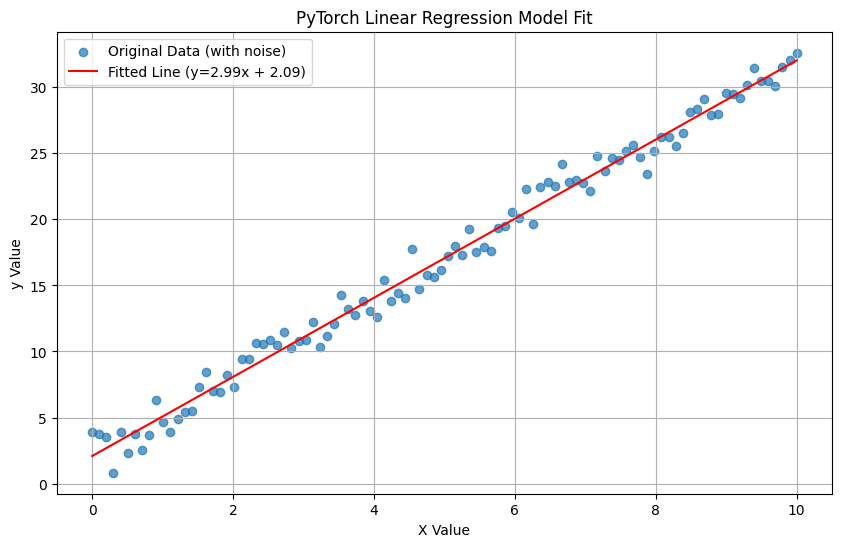

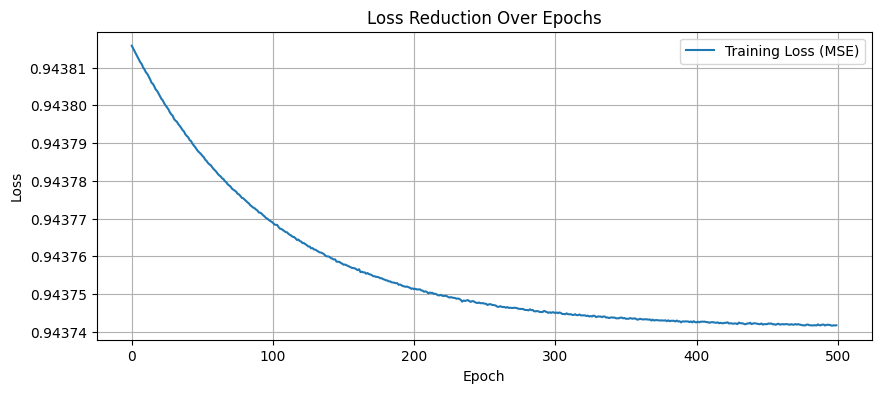

In [41]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), label='Original Data (with noise)', alpha=0.7)
plt.plot(X.numpy(), y_predicted.numpy(), 'r-', label=f'Fitted Line (y={final_w:.2f}x + {final_b:.2f})')
plt.title("PyTorch Linear Regression Model Fit")
plt.xlabel("X Value")
plt.ylabel("y Value")
plt.legend()
plt.grid(True)
plt.show()

print('\n')

# Plotting the loss history
plt.figure(figsize=(10, 4))
plt.plot(loss_history, label='Training Loss (MSE)')
plt.title("Loss Reduction Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()